In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
os.chdir('E:/DataScience/2021/trafficsigns_dataset')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
import cv2

In [60]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [31]:
cur_path

'E:\\DataScience\\2021\\trafficsigns_dataset'

In [61]:
#Image preprocessing
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a) 
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [62]:
#Convert the image into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [64]:
#Save the data and labels.
#os.mkdir('training')
np.save('./training/data',data)
np.save('./training/target',labels)

In [65]:
#Loading data and labels.
data = np.load('./training/data.npy')
labels = np.load('./training/target.npy')

In [66]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [67]:
X_train, X_test, y_train, y_test = train_test_split(data,labels,test_size=0.2,random_state=0)

In [68]:
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [69]:
#Convert labels to onehot encoding
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)

### Model Building.

In [70]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size = (5,5), activation = 'relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size = (5,5), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten()) 
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [72]:
#model compilation.
model.compile(loss= 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [73]:
epochs = 30
history = model.fit(X_train, y_train, batch_size = 32, epochs=epochs,validation_data = (X_test,y_test))


Train on 31367 samples, validate on 7842 samples
Epoch 1/30
31367/31367 [==============================] - 29s 924us/step - loss: 1.9317 - accuracy: 0.4956 - val_loss: 0.6409 - val_accuracy: 0.8256
Epoch 2/30
31367/31367 [==============================] - 26s 814us/step - loss: 0.7098 - accuracy: 0.7880 - val_loss: 0.2892 - val_accuracy: 0.9144
Epoch 3/30
31367/31367 [==============================] - 25s 812us/step - loss: 0.4955 - accuracy: 0.8525 - val_loss: 0.3217 - val_accuracy: 0.9069
Epoch 4/30
31367/31367 [==============================] - 25s 811us/step - loss: 0.4058 - accuracy: 0.8781 - val_loss: 0.1405 - val_accuracy: 0.9584
Epoch 5/30
31367/31367 [==============================] - 26s 813us/step - loss: 0.3627 - accuracy: 0.8927 - val_loss: 0.1433 - val_accuracy: 0.9574
Epoch 6/30
31367/31367 [==============================] - 25s 812us/step - loss: 0.3141 - accuracy: 0.9073 - val_loss: 0.1080 - val_accuracy: 0.9695
Epoch 7/30
31367/31367 [==============================] 

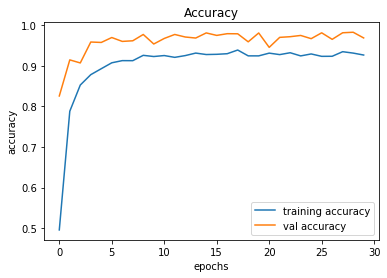

In [74]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

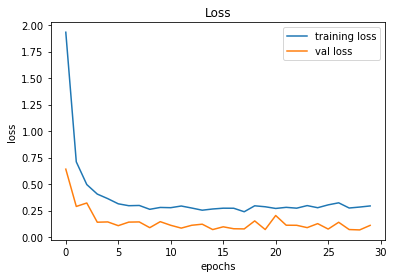

In [75]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [76]:
#Test the Data

def testing(testcsv):
    y_test = pd.read_csv('Test.csv')
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [77]:
X_test,label = testing('Test.csv')

In [78]:
Y_pred = model.predict_classes(X_test)
Y_pred

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [79]:
## Accuracy of the test Data

from sklearn.metrics import accuracy_score
print(accuracy_score(label,Y_pred))

0.93784639746635


In [80]:
#Save the Model.

model.save("./training/Traffic.h5")

In [81]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [82]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

Predicted traffic sign is:  Priority road


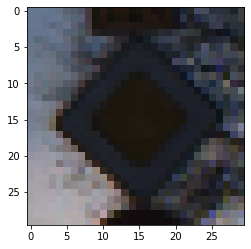

In [85]:
plot,prediction = test_on_img(r'E:\\DataScience\\2021\\trafficsigns_dataset\\test\\00300.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()